# Project 1

## Step 1: Load the data and perform basic operations.

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

##### 1. Load the data in using pandas.

In [2]:
act = pd.read_csv('../data/act.csv')
sat = pd.read_csv('../data/sat.csv')

##### 2. Print the first ten rows of each dataframe.

In [3]:
act.head(10)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [4]:
sat.head(10)

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


##### 3. Describe in words what each variable (column) is.

### Data Columns
#### SAT:
1. **Unnamed:** The unnammed column is identifying the index for each row (axis=0)
2. **State:** The state within the United States of America
3. **Participation:** The measured participation rate in the SAT for the identified state
4. **Evidence-Based Reading and Writing:** The average score on the reading and writing portion of the SAT exam for the identified state.
5. **Math:** The average score on the math portion of the SAT exam for the identified state.
6. **Total:** The average total score for the SAT exam for the identified state.

#### ACT:
1. **Unnamed:** The unnammed column is identifying the index for each row (axis=0)
2. **State:** The state within the United States of America
3. **Participation:** The measured participation rate in the ACT for the identified state
4. **English:** The average score on the english portion of the ACT exam for the identified state.
5. **Math:** The average score on the math portion of the ACT exam for the identified state.
6. **Reading:** The average score on the reading portion of the ACT exam for the identified state.
7. **Science:** The average score on the science portion of the ACT exam for the identified state.
8. **Composite:** The average total composite score for the ACT exam for the identified state.

##### 4. Does the data look complete? Are there any obvious issues with the observations?

Examination of data:
1. In the SAT exam data, there is a state for 'National' which is not a state in the USA
2. In both the SAT and ACT exam data, there is a state for District of Columbia which is not a state in the USA
3. There are participation rates of 100% which should be extremly unlikely. 

I also think there should be additional data on the following to provide more insight on the participation rates by state:
1. Time of year the exams are available to the students to take the exam
2. The average distance from the students high school the exams are made available to the students
3. The participation rate by race would be a great demographic piece of data to analyze which races are participating the most and which are participating the least
4. As a follow up to number 3, each states average participation rate for each race
5. The cost of the exams by state 
6. Each states average household income

##### 5. Print the types of each column.

In [5]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
Unnamed: 0       52 non-null int64
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ KB


In [6]:
act.shape

(52, 8)

In [7]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
Unnamed: 0                            51 non-null int64
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


In [8]:
sat.shape

(51, 6)

In [9]:
act.head()

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [10]:
sat.head()

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055


**6. Do any types need to be reassigned? If so, go ahead and do it.**

In [11]:
act.dtypes

Unnamed: 0         int64
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [12]:
act['Participation'] = act['Participation'].map(lambda p_cell: p_cell.replace('%',''))

In [13]:
act['Participation'] = act['Participation'].astype(float)

In [14]:
act['Participation'] = act['Participation'].div(100).round(2)

In [15]:
act.drop('Unnamed: 0', axis=1, inplace = True) # run this both data sets

In [16]:
act.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [17]:
sat.dtypes

Unnamed: 0                             int64
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [18]:
sat['Participation'] = sat['Participation'].map(lambda sp_cell: sp_cell.replace('%', ''))

In [19]:
sat['Participation'] = sat['Participation'].astype(float)

In [20]:
sat['Participation'] = sat['Participation'].div(100).round(2)

In [21]:
sat.drop('Unnamed: 0', axis=1, inplace=True)

In [22]:
sat.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [ ]:
new_act_dict = act.set_index('State').to_dict()
new_act_dict
new_sat_dict = sat.set_index('State').to_dict()
new_sat_dict['Participation']

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [23]:
sat_dict_column = sat.to_dict('list')
#sat_dict_column

In [24]:
act_dict_column = act.to_dict('list')
#act_dict_column

##### 9. Merge the dataframes on the state column.

In [25]:
sat.set_index('State', inplace=True)
act.set_index('State', inplace=True)

In [26]:
country_exam_scores_df = pd.merge(sat,act, on='State')

In [27]:
sat.head()

,Participation,Evidence-Based Reading and Writing,Math,Total
State,,,,
Alabama,0.05,593,572,1165
Alaska,0.38,547,533,1080
Arizona,0.30,563,553,1116
Arkansas,0.03,614,594,1208
California,0.53,531,524,1055


In [28]:
act.head(2)

,Participation,English,Math,Reading,Science,Composite
State,,,,,,
National,0.6,20.3,20.7,21.4,21.0,21.0
Alabama,1.0,18.9,18.4,19.7,19.4,19.2


In [29]:
country_exam_scores_df.head()

,Participation_x,Evidence-Based Reading and Writing,Math_x,Total,Participation_y,English,Math_y,Reading,Science,Composite
State,,,,,,,,,,
Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


In [30]:
country_exam_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 10 columns):
Participation_x                       51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math_x                                51 non-null int64
Total                                 51 non-null int64
Participation_y                       51 non-null float64
English                               51 non-null float64
Math_y                                51 non-null float64
Reading                               51 non-null float64
Science                               51 non-null float64
Composite                             51 non-null float64
dtypes: float64(7), int64(3)
memory usage: 4.4+ KB


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [31]:
new_columns_dict = {
        'Participation_x':'participation_rate_sat',
        'Evidence-Based Reading and Writing':'reading_writing_avg_sat',
        'Math_x':'math_avg_sat',
        'Total':'total_avg_sat',
        'Participation_y':'participation_rate_act',
        'English':'english_avg_act',
        'Math_y':'math_avg_act',
        'Reading':'reading_avg_act',
        'Science':'science_avg_act',
        'Composite':'total_avg_act',
    }
country_exam_scores_df.rename(columns=new_columns_dict, inplace=True)

In [32]:
country_exam_scores_df.head()

,participation_rate_sat,reading_writing_avg_sat,math_avg_sat,total_avg_sat,participation_rate_act,english_avg_act,math_avg_act,reading_avg_act,science_avg_act,total_avg_act
State,,,,,,,,,,
Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [33]:
country_exam_scores_df.describe()

,participation_rate_sat,reading_writing_avg_sat,math_avg_sat,total_avg_sat,participation_rate_act,english_avg_act,math_avg_act,reading_avg_act,science_avg_act,total_avg_act
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,547.627451,1126.098039,0.652549,20.931373,21.182353,22.013725,21.041176,21.519608
std,0.352766,45.666901,84.909119,92.494812,0.321408,2.353677,1.981989,2.067271,3.182463,2.020695
min,0.020000,482.000000,52.000000,950.000000,0.080000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,0.040000,533.500000,522.000000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.900000,19.800000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,22.750000,23.600000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [34]:
def std_deviation_funct(numbers):
    mean = np.mean(numbers)     
    std = (sum([(n-mean)**2 for n in numbers])/(len(numbers)-1))**.5
    return std

In [35]:
numbers = [4,8,6,12]

In [36]:
std_deviation_funct(numbers)

3.415650255319866

In [37]:
country_exam_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 10 columns):
participation_rate_sat     51 non-null float64
reading_writing_avg_sat    51 non-null int64
math_avg_sat               51 non-null int64
total_avg_sat              51 non-null int64
participation_rate_act     51 non-null float64
english_avg_act            51 non-null float64
math_avg_act               51 non-null float64
reading_avg_act            51 non-null float64
science_avg_act            51 non-null float64
total_avg_act              51 non-null float64
dtypes: float64(7), int64(3)
memory usage: 4.4+ KB


In [38]:
country_exam_scores_df.loc[:,"math_avg_sat"].std()

84.90911865855486

In [39]:
country_exam_scores_df[['math_avg_sat']].apply(std_deviation_funct)

math_avg_sat    84.909119
dtype: float64

In [40]:
country_exam_scores_df.apply(std_deviation_funct)

participation_rate_sat      0.352766
reading_writing_avg_sat    45.666901
math_avg_sat               84.909119
total_avg_sat              92.494812
participation_rate_act      0.321408
english_avg_act             2.353677
math_avg_act                1.981989
reading_avg_act             2.067271
science_avg_act             3.182463
total_avg_act               2.020695
dtype: float64

In [41]:
sd = list(country_exam_scores_df.apply(std_deviation_funct))
sd

[0.35276632270013036,
 45.66690138768932,
 84.90911865855486,
 92.49481172519046,
 0.32140842015886834,
 2.35367713980303,
 1.9819894936505533,
 2.0672706264873146,
 3.182462975155452,
 2.020694891154341]

In [42]:
mask_df = country_exam_scores_df.select_dtypes(include=[np.number])
mask_df.describe()

,participation_rate_sat,reading_writing_avg_sat,math_avg_sat,total_avg_sat,participation_rate_act,english_avg_act,math_avg_act,reading_avg_act,science_avg_act,total_avg_act
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,547.627451,1126.098039,0.652549,20.931373,21.182353,22.013725,21.041176,21.519608
std,0.352766,45.666901,84.909119,92.494812,0.321408,2.353677,1.981989,2.067271,3.182463,2.020695
min,0.020000,482.000000,52.000000,950.000000,0.080000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,0.040000,533.500000,522.000000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.900000,19.800000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,22.750000,23.600000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000


## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [43]:
mask_df.loc['SD']= sd

In [44]:
mask_df.tail()

,participation_rate_sat,reading_writing_avg_sat,math_avg_sat,total_avg_sat,participation_rate_act,english_avg_act,math_avg_act,reading_avg_act,science_avg_act,total_avg_act
State,,,,,,,,,,
Washington,0.640000,541.000000,534.000000,1075.000000,0.290000,20.900000,21.900000,22.100000,22.000000,21.900000
West Virginia,0.140000,558.000000,528.000000,1086.000000,0.690000,20.000000,19.400000,21.200000,20.500000,20.400000
Wisconsin,0.030000,642.000000,649.000000,1291.000000,1.000000,19.700000,20.400000,20.600000,20.900000,20.500000
Wyoming,0.030000,626.000000,604.000000,1230.000000,1.000000,19.400000,19.800000,20.800000,20.600000,20.200000
SD,0.352766,45.666901,84.909119,92.494812,0.321408,2.353677,1.981989,2.067271,3.182463,2.020695


In [45]:
country_exam_scores_df.tail()

,participation_rate_sat,reading_writing_avg_sat,math_avg_sat,total_avg_sat,participation_rate_act,english_avg_act,math_avg_act,reading_avg_act,science_avg_act,total_avg_act
State,,,,,,,,,,
Virginia,0.65,561,541,1102,0.29,23.5,23.3,24.6,23.5,23.8
Washington,0.64,541,534,1075,0.29,20.9,21.9,22.1,22.0,21.9
West Virginia,0.14,558,528,1086,0.69,20.0,19.4,21.2,20.5,20.4
Wisconsin,0.03,642,649,1291,1.00,19.7,20.4,20.6,20.9,20.5
Wyoming,0.03,626,604,1230,1.00,19.4,19.8,20.8,20.6,20.2


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [46]:
country_exam_scores_df.sort_values('participation_rate_sat', ascending=False).head()

,participation_rate_sat,reading_writing_avg_sat,math_avg_sat,total_avg_sat,participation_rate_act,english_avg_act,math_avg_act,reading_avg_act,science_avg_act,total_avg_act
State,,,,,,,,,,
District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2
Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,24.1
Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2
Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1
New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,25.5


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [47]:
country_exam_scores_df[(country_exam_scores_df['participation_rate_sat'] > .5)].head()

,participation_rate_sat,reading_writing_avg_sat,math_avg_sat,total_avg_sat,participation_rate_act,english_avg_act,math_avg_act,reading_avg_act,science_avg_act,total_avg_act
State,,,,,,,,,,
California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8
Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2
Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1
District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2
Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

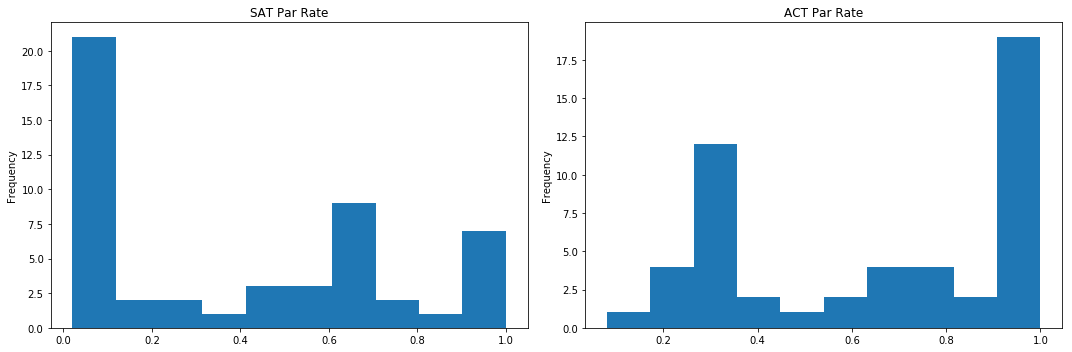

In [48]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5));

# SAT Rate
country_exam_scores_df['participation_rate_sat'].plot(title = 'SAT Par Rate', kind='hist', ax=ax[0]);

# ACT Rate
country_exam_scores_df['participation_rate_act'].plot(title = 'ACT Par Rate', kind='hist', ax=ax[1]);

plt.tight_layout()

##### 17. Plot the Math(s) distributions from both data sets.

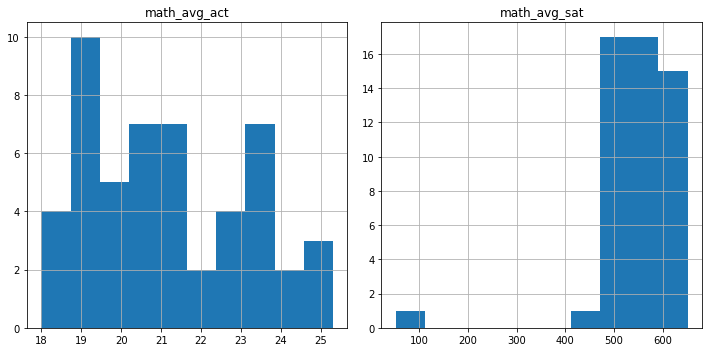

In [49]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5));

country_exam_scores_df.hist('math_avg_act', ax=ax[0]);

country_exam_scores_df.hist('math_avg_sat', ax=ax[1]);

plt.tight_layout();

##### 18. Plot the Verbal distributions from both data sets.

In [50]:
country_exam_scores_df.head(2)

,participation_rate_sat,reading_writing_avg_sat,math_avg_sat,total_avg_sat,participation_rate_act,english_avg_act,math_avg_act,reading_avg_act,science_avg_act,total_avg_act
State,,,,,,,,,,
Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8


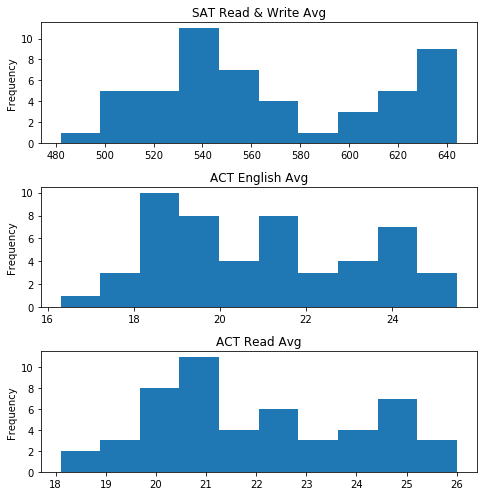

In [51]:
figure, ax = plt.subplots(nrows=3, ncols=1, figsize=(7, 7));

# SAT Reading & Wrting
country_exam_scores_df['reading_writing_avg_sat'].plot(title = 'SAT Read & Write Avg', kind='hist', ax=ax[0]);

# ACT English
country_exam_scores_df['english_avg_act'].plot(title = 'ACT English Avg', kind='hist', ax=ax[1]);

# ACT Read
country_exam_scores_df['reading_avg_act'].plot(title = 'ACT Read Avg', kind='hist', ax=ax[2])

plt.tight_layout()

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

That it's going to be a normal distribution.

##### 20. Does this assumption hold true for any of our columns? Which?

None of the columns look totally perfect but some do look close

##### 21. Plot some scatterplots examining relationships between all variables.

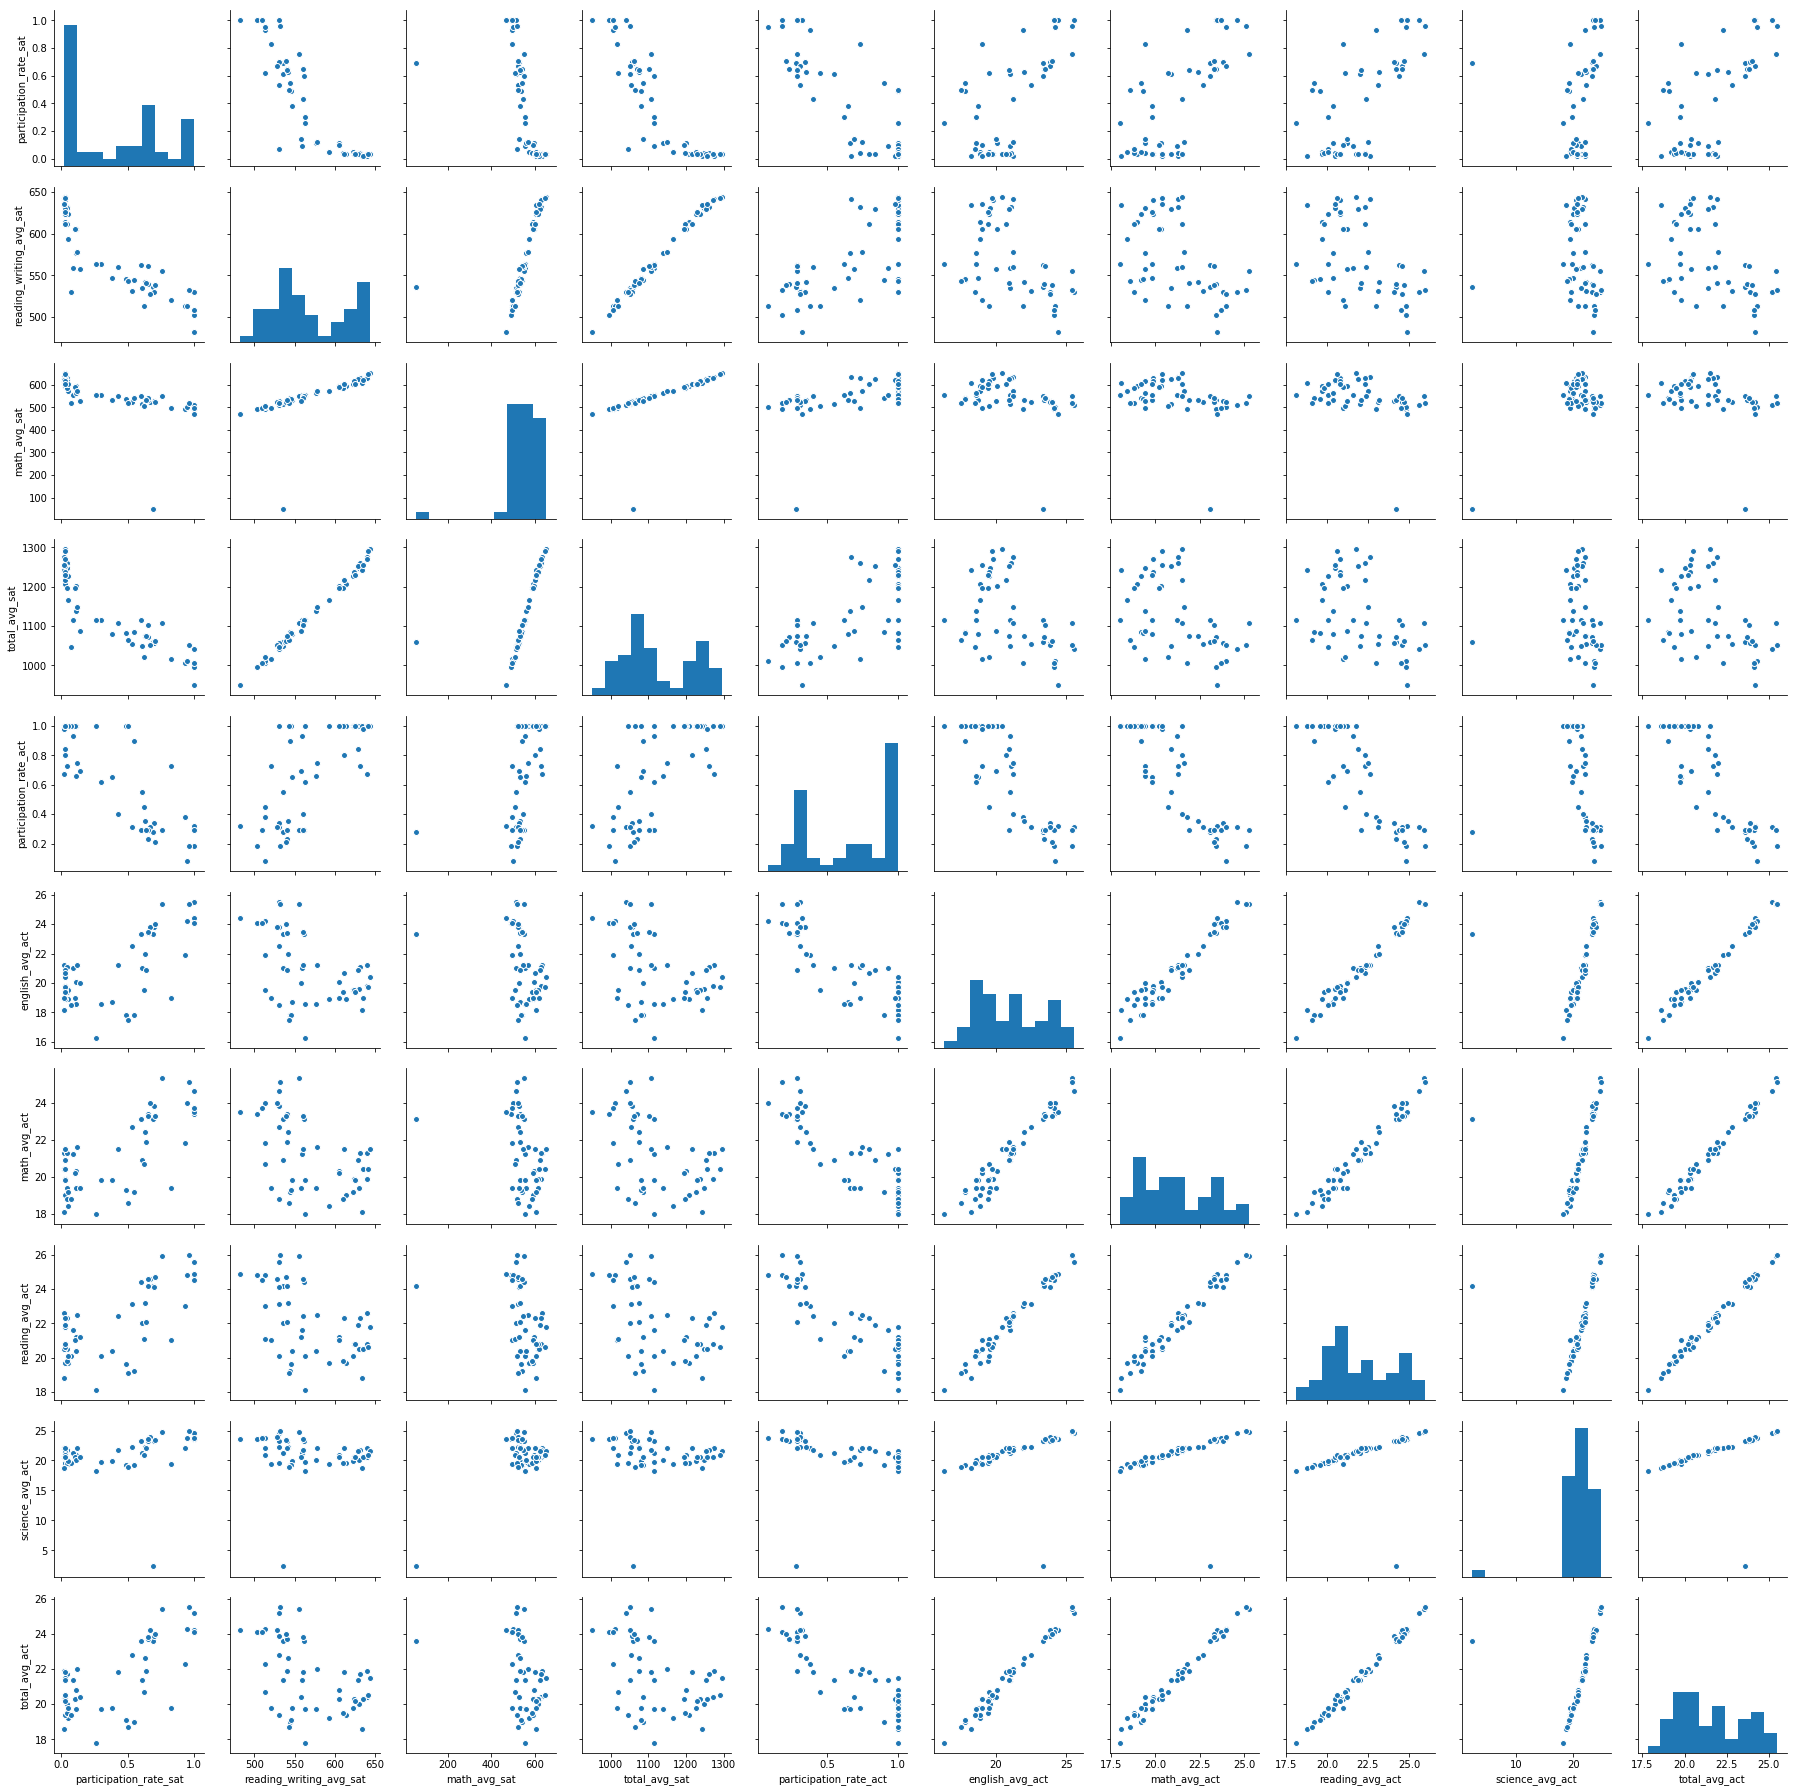

In [52]:
sns.pairplot(country_exam_scores_df)

##### 22. Are there any interesting relationships to note?

**Interesting relationships:**
1. Looks like almost a perfect linear relationship between each states total SAT score and each states avg SAT reading and writing score
2. Looks like almost a perfect linear relationship between each states total ACT score and each of the individual portions of the ACT exam (reading, math, english)
3. Looks like there is an outlier where a few states have students who did bad on the bad on the SAT math but did well on the ACT overall

In [53]:
country_exam_scores_df.head(1)

,participation_rate_sat,reading_writing_avg_sat,math_avg_sat,total_avg_sat,participation_rate_act,english_avg_act,math_avg_act,reading_avg_act,science_avg_act,total_avg_act
State,,,,,,,,,,
Alabama,0.05,593,572,1165,1.0,18.9,18.4,19.7,19.4,19.2


##### 23. Create box plots for each variable. 

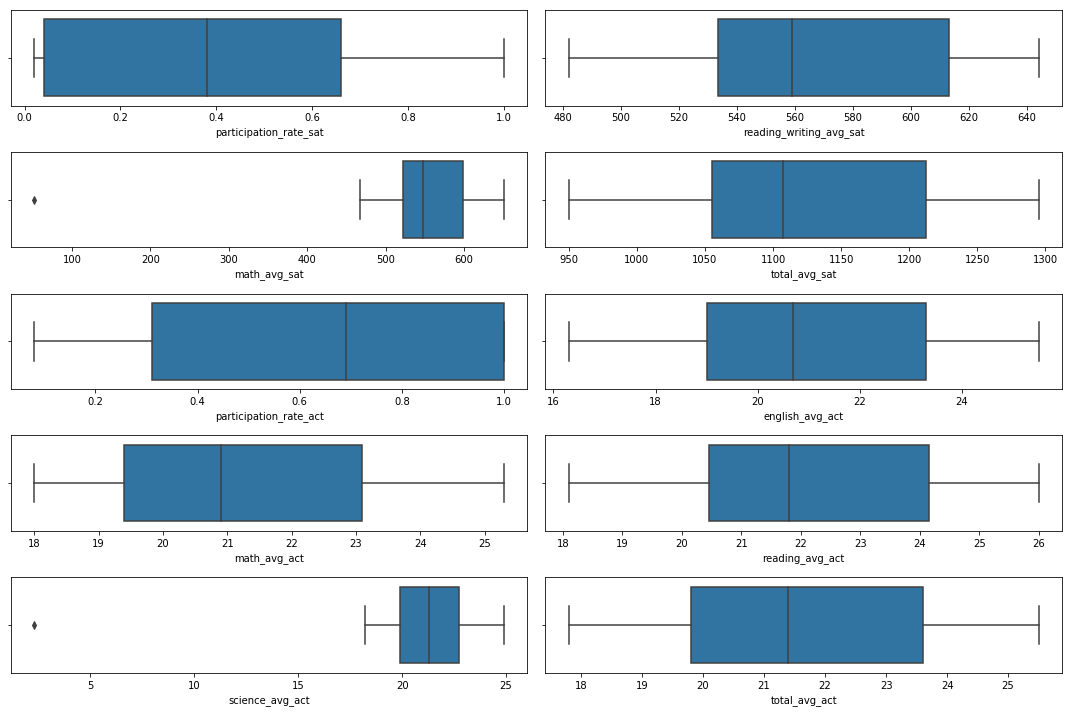

In [54]:
figure, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 10));

sns.boxplot(country_exam_scores_df.participation_rate_sat, ax=ax[0,0]);
sns.boxplot(country_exam_scores_df.reading_writing_avg_sat, ax=ax[0,1]);
sns.boxplot(country_exam_scores_df.math_avg_sat, ax=ax[1,0]);
sns.boxplot(country_exam_scores_df.total_avg_sat, ax=ax[1,1]);
sns.boxplot(country_exam_scores_df.participation_rate_act, ax=ax[2,0]);
sns.boxplot(country_exam_scores_df.english_avg_act, ax=ax[2,1]);
sns.boxplot(country_exam_scores_df.math_avg_act, ax=ax[3,0]);
sns.boxplot(country_exam_scores_df.reading_avg_act, ax=ax[3,1]);
sns.boxplot(country_exam_scores_df.science_avg_act, ax=ax[4,0]);
sns.boxplot(country_exam_scores_df.total_avg_act, ax=ax[4,1]);

plt.tight_layout();

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

**Participation Rate SAT:**
1. The median rate of participation is close to 40% meaning that on average almost half of the students across all states in the US are taking the SAT.

**Reading and Writing SAT:**
1. From the students who take the SAT, most students score in the 500's and above so around 75% for the reading and writing portion.

**Math SAT:**
1. From the students who take the SAT, the bulk of all scores on the math fall in the upper part of the scoring between 500 and 600.

**Total SAT:**
1. From the students who take the SAT, the average scores on the SAT are in the 1100 to 1200 range.

**Participation Rate ACT:**
1. There is a very high ACT participation rate with almost all of the states achieving a participation rate of 70% or above.

**English ACT:**
1. From the students who take the ACT, there is a good spread of scores between 19 and 23.

**Math ACT:**
1. From the students who take the ACT, there is a good spread of scores between 19.5 and 23 almost equivalent to the English ACT spread of scores

**Reading ACT:**
1. From the students who take the ACT, there is a good spread of scores between 20.5 and 24 again almost equivalent to the English ACT, and Math ACT spread of scores

**Science ACT:**
1. From the students who take the ACT, the scores are very high with almost all states averaging scores above 20.

**Total ACT:**
1. From the students who take the ACT, there is a good spread of scores between 20 and 23.5 which again is very close to 3 of the main portions of the ACT (English, Math, Reading)

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

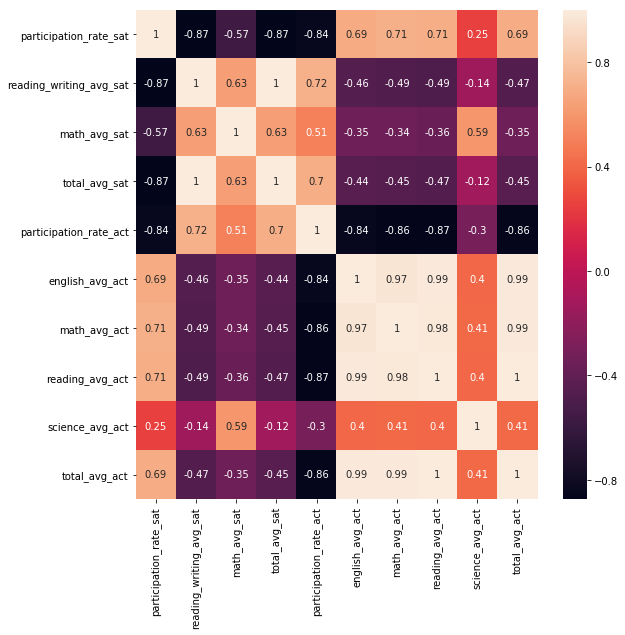

In [55]:
plt.figure(figsize=(9,9))
sns.heatmap(country_exam_scores_df.corr(), annot=True);

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [56]:
sat_mean = country_exam_scores_df['participation_rate_sat'].mean()
act_mean = country_exam_scores_df['participation_rate_act'].mean()

sat_mean, act_mean

(0.39803921568627454, 0.6525490196078431)

$H_0$: The mean of the SAT Participation Rates **is** equal to the mean of the ACT Participation Rates<br>
$H_1$: The mean of the SAT Participation Rates **is not** equal to the mean of the ACT Participation Rates

- Alpha = 0.05

In [57]:
stats.ttest_ind(country_exam_scores_df['participation_rate_sat'], country_exam_scores_df['participation_rate_act'])

Ttest_indResult(statistic=-3.8085778908170544, pvalue=0.00024134203698662353)

#### Results
- If $p < \alpha$, then there is evidence to reject the null hypothesis, i.e., something's going on, i.e., a statisically significant difference!
- If $p > \alpha$, then there is insufficient evidence to reject the null hypothesis, i.e., business as usual, i.e., there is no statistical difference between your two groups.

The t-test above shows that the p-value is less than the alpha. This means we can reject the $H_0$ hypothesis.

- This proves there is a significant statistical difference between the means of the SAT Participation rates and ACT Participation rates.

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [58]:
sample_mean = country_exam_scores_df['participation_rate_sat'].mean()
z_star = 1.96                          ## 95 % confidence interval
sigma = country_exam_scores_df['participation_rate_sat'].std()
n = len(country_exam_scores_df)

low_end_sat = sample_mean - z_star * sigma / n ** 0.5

high_end_sat = sample_mean + z_star * sigma / n ** 0.5

In [59]:
low_end_sat, high_end_sat

(0.3012207711116876, 0.4948576602608615)

In [60]:
sample_mean = country_exam_scores_df['participation_rate_act'].mean()
z_star = 1.96                          ## 95 % confidence interval
sigma = country_exam_scores_df['participation_rate_act'].std()
n = len(country_exam_scores_df['participation_rate_act'])

low_end_act = sample_mean - z_star * sigma / n ** 0.5

high_end_act = sample_mean + z_star * sigma / n ** 0.5

In [61]:
low_end_act, high_end_act

(0.5643369049287186, 0.7407611342869675)

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

The answer to 27 is not surprising because the 95% interval range handles both of the SAT and ACT participation means which are also two different values.
- SAT Mean = 0.398 and SAT 95% confidence interval = (0.301, 0.494)
- ACT Mean = 0.652 and SAT 95% confidence interval = (0.564, 0.740)

In [62]:
sat_mean = country_exam_scores_df['participation_rate_sat'].mean()
act_mean = country_exam_scores_df['participation_rate_act'].mean()

sat_mean, act_mean

(0.39803921568627454, 0.6525490196078431)

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

The data to me says that yes we should generate correlation between SAT and ACT because those that scored high on the Math ACT also high on the Math SAT.
- Math SAT > 400 is pretty equivalent to Math ACT > 17.5

<Figure size 1440x360 with 0 Axes>

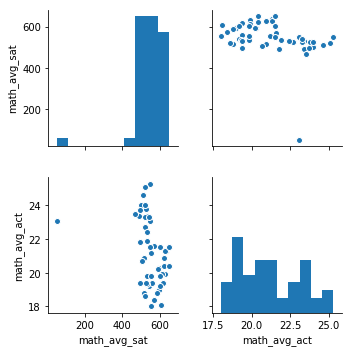

In [63]:
plt.figure(figsize=(20,5));
sns.pairplot(country_exam_scores_df[['math_avg_sat', 'math_avg_act']]);
plt.tight_layout();

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

Performing statistical inference on the SAT and ACT data doesn't make sense based on the data that is currently collected in the data set. Along with participation rates, the data provided then only shows each states mean average for their students overall exam scores and also the average scores for each portion of the exam. This data doesn't take into account the vast differences in most of the states population sizes which means our samples are not being put on an equal scale which can throw off the story our data is telling. 

##### Presentation Code Below

In [64]:
a_mean = country_exam_scores_df.participation_rate_act.mean()
s_mean = country_exam_scores_df.participation_rate_sat.mean()

In [65]:
df_means = pd.DataFrame(np.array([[a_mean, s_mean]]), columns=['ACT','SAT'])
df_means

,ACT,SAT
0,0.652549,0.398039


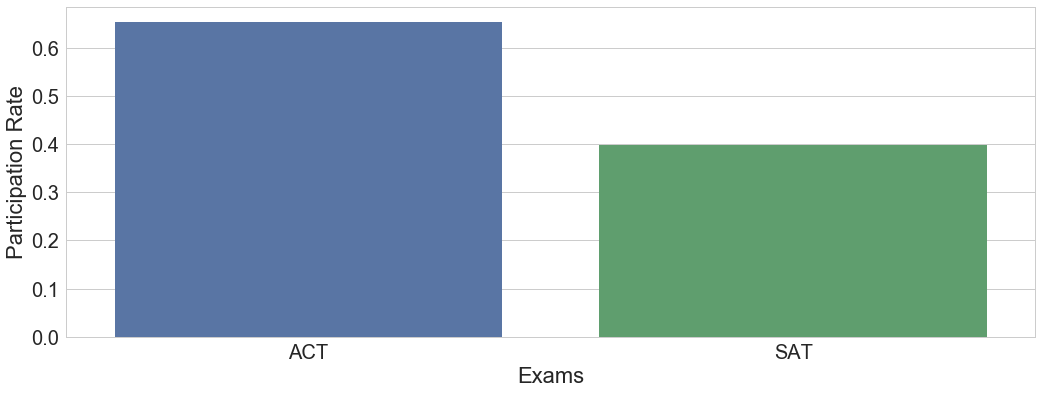

In [66]:
sns.set(style="whitegrid", font_scale=2)
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=df_means)
plt.xlabel('Exams')
plt.ylabel('Participation Rate')
plt.tight_layout();
plt.savefig('../plots/mean_part_rates')

In [67]:
act_required = country_exam_scores_df.loc[
    ['Kentucky', 'Louisiana', 'Mississippi', 'Missouri', 'Utah', 'Wisconsin'],
    ['participation_rate_act', 'participation_rate_sat']
]

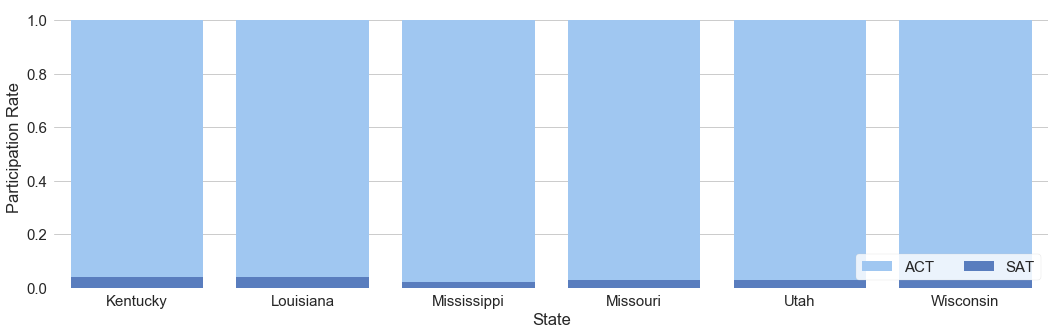

In [68]:
sns.set(style="whitegrid", font_scale=1.5)
f, ax = plt.subplots(figsize=(15, 5))
sns.set_color_codes("pastel")


sns.barplot(x=act_required.index, y="participation_rate_act", data=act_required, label="ACT", color='b')
sns.set_color_codes("muted")
sns.barplot(x=act_required.index, y="participation_rate_sat", data=act_required, label="SAT", color='b')


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Participation Rate",
       xlabel="State")
sns.despine(left=True, bottom=True)
plt.tight_layout();
plt.savefig('../plots/act_req.png')

In [69]:
country_exam_scores_df.head()

,participation_rate_sat,reading_writing_avg_sat,math_avg_sat,total_avg_sat,participation_rate_act,english_avg_act,math_avg_act,reading_avg_act,science_avg_act,total_avg_act
State,,,,,,,,,,
Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


In [70]:
low_act = country_exam_scores_df.sort_values('total_avg_act').head()

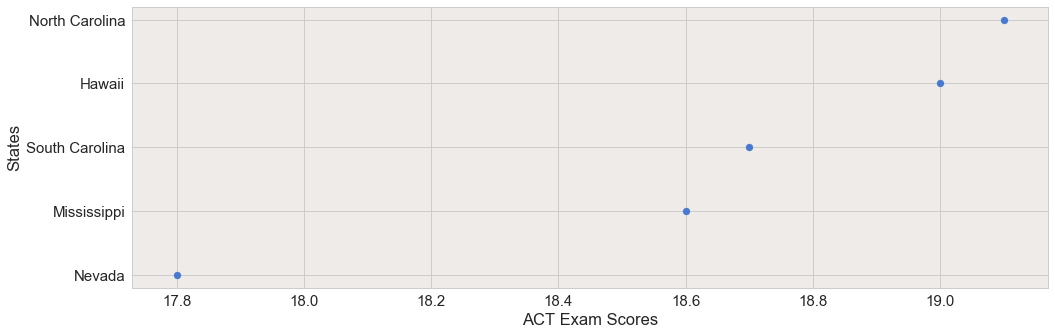

In [71]:
plt.figure(figsize=(15,5));
ax = plt.gca()
ax.set_facecolor('#eeebe8')
plt.scatter(low_act.total_avg_act, y=low_act.index, c='b');
plt.xlabel('ACT Exam Scores')
plt.ylabel('States')
plt.tight_layout();
plt.savefig('../plots/low_act')

In [72]:
low_act.head()

,participation_rate_sat,reading_writing_avg_sat,math_avg_sat,total_avg_sat,participation_rate_act,english_avg_act,math_avg_act,reading_avg_act,science_avg_act,total_avg_act
State,,,,,,,,,,
Nevada,0.26,563,553,1116,1.0,16.3,18.0,18.1,18.2,17.8
Mississippi,0.02,634,607,1242,1.0,18.2,18.1,18.8,18.8,18.6
South Carolina,0.50,543,521,1064,1.0,17.5,18.6,19.1,18.9,18.7
Hawaii,0.55,544,541,1085,0.9,17.8,19.2,19.2,19.3,19.0
North Carolina,0.49,546,535,1081,1.0,17.8,19.3,19.6,19.3,19.1


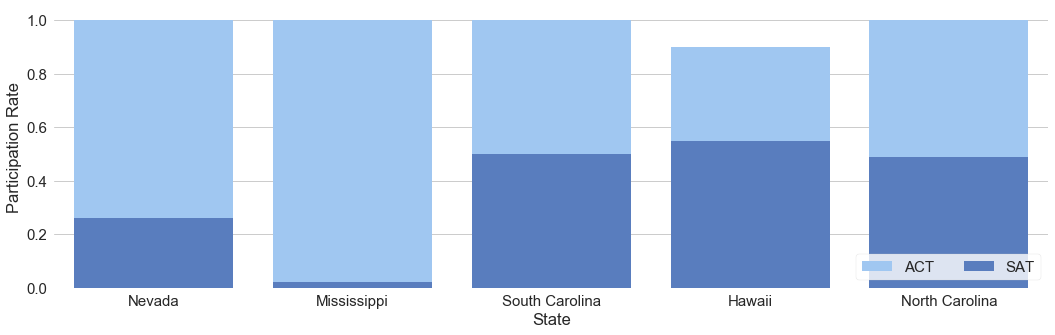

In [73]:
sns.set(style="whitegrid", font_scale=1.5)
f, ax = plt.subplots(figsize=(15, 5))
sns.set_color_codes("pastel")


sns.barplot(x=low_act.index, y="participation_rate_act", data=low_act, label="ACT", color='b')
sns.set_color_codes("muted")
sns.barplot(x=low_act.index, y="participation_rate_sat", data=low_act, label="SAT", color='b')


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Participation Rate",
       xlabel="State")
sns.despine(left=True, bottom=True)
plt.tight_layout();
plt.savefig('../plots/low_act_part_rates.png')

In [74]:
low_act.total_avg_sat.describe()

count       5.000000
mean     1117.600000
std        72.029855
min      1064.000000
25%      1081.000000
50%      1085.000000
75%      1116.000000
max      1242.000000
Name: total_avg_sat, dtype: float64

In [75]:
sat_low_act = low_act.total_avg_sat.mean()
sat_low_act

1117.6

In [76]:
country_max = country_exam_scores_df.total_avg_sat.max()
country_max

1295

In [77]:
sample_vs_max = pd.DataFrame(np.array([[sat_low_act, country_max]]), columns=['SAT Avg-Low ACT','SAT State Max'])
sample_vs_max

,SAT Avg-Low ACT,SAT State Max
0,1117.6,1295.0


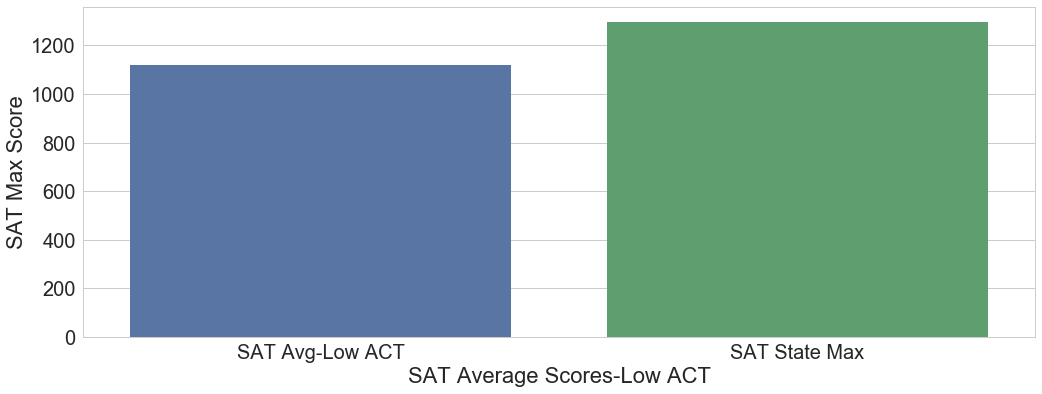

In [78]:
sns.set(style="whitegrid", font_scale=2)
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=sample_vs_max)
plt.xlabel('SAT Average Scores-Low ACT')
plt.ylabel('SAT Max Score')
plt.tight_layout();
plt.savefig('../plots/SAT Average Scores-Low ACT')